# **Assignment 3**
# **Sankarshan Mishra**

In [35]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
#2.Loading Dataset
data = pd.read_csv("/content/penguins_size.csv")
print(data.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [37]:
print(data.shape)
print(data.info())

(344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


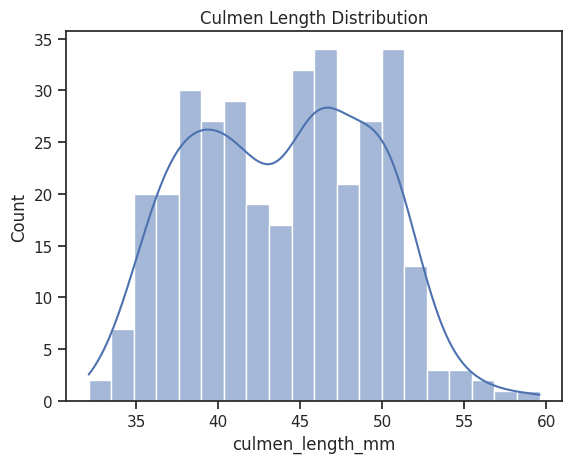

In [38]:
#performing Visualizations
#univariate analysis
sns.histplot(data["culmen_length_mm"], bins=20, kde=True)
plt.title("Culmen Length Distribution")
plt.show()

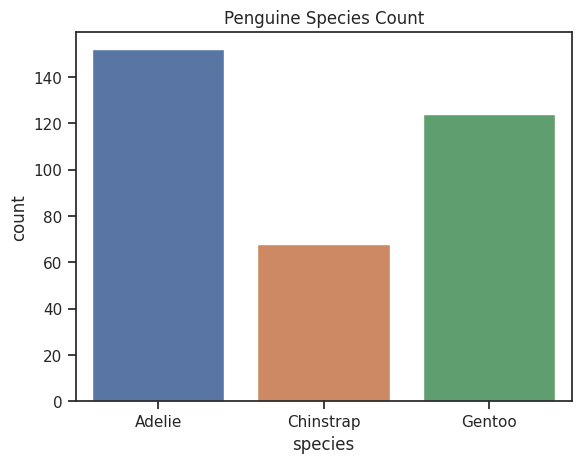

In [39]:
sns.countplot(data=data, x="species")
plt.title("Penguine Species Count")
plt.show()

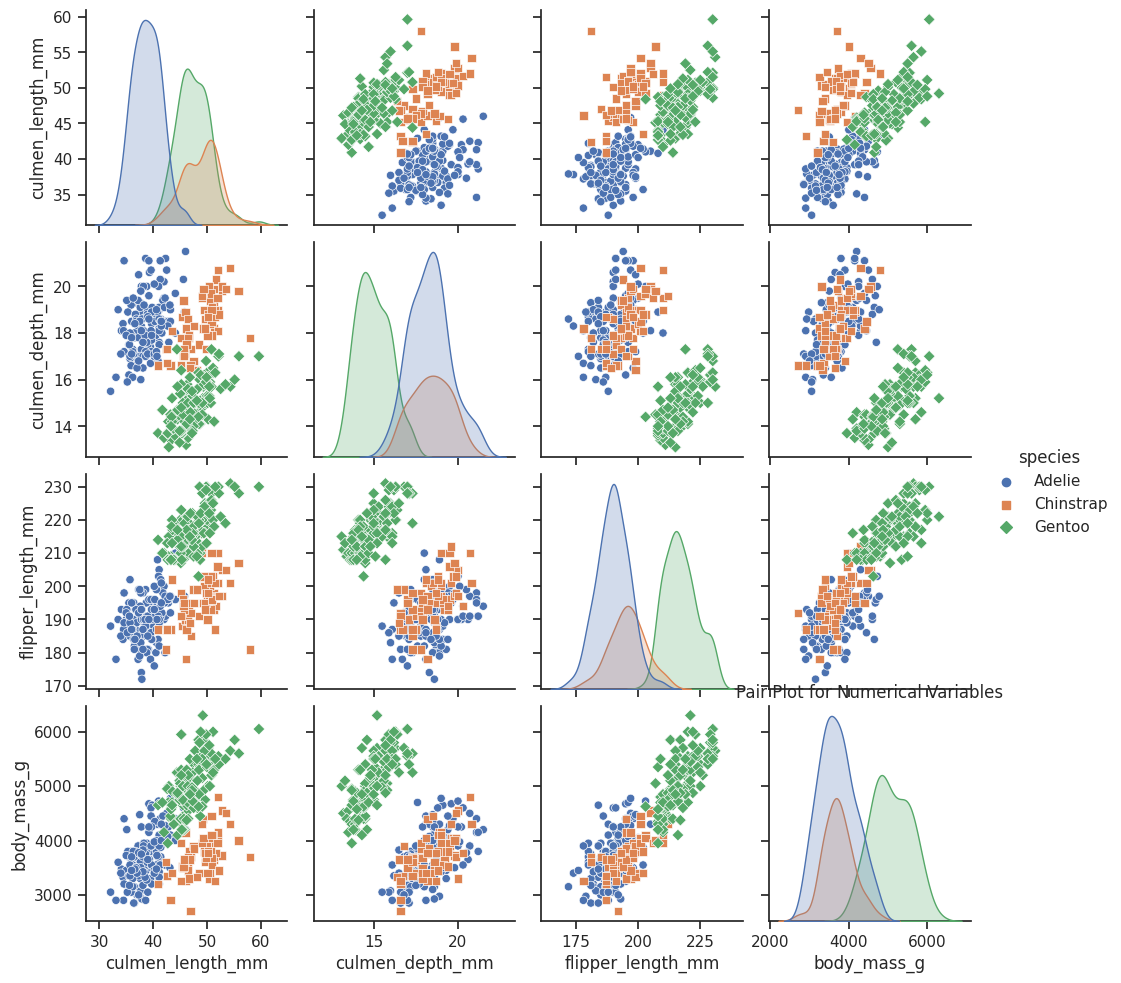

In [40]:
#Bivariate Analysis
sns.pairplot(data,hue="species", markers=["o", "s", "D"])
plt.title("Pair Plot for Numerical Variables")
plt.show()

<ipython-input-41-21a6373a590b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


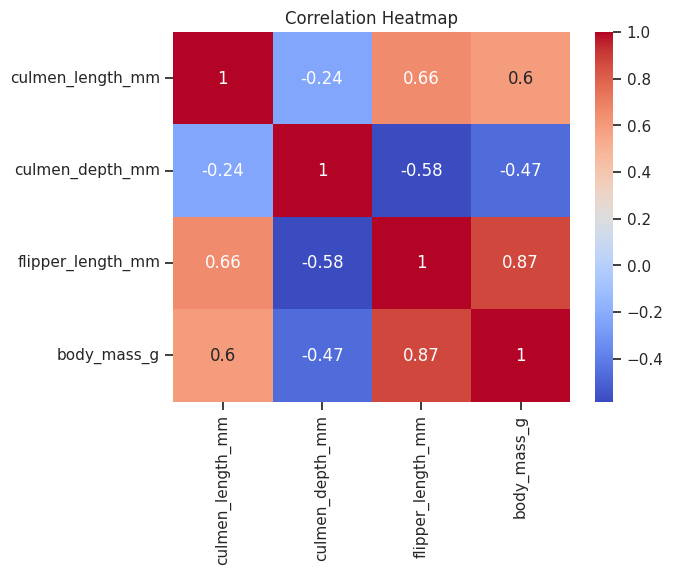

In [41]:
#multivariate analysis
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
#perform descriptive analysis
print(data.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [43]:
#check for missing values and dealing with that by replacing the null value with the mode value of that particular parameter.
print(data.isnull().sum())

for c in data.columns:
  data[c].fillna(data[c].mode()[0],inplace=True)

print(data.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


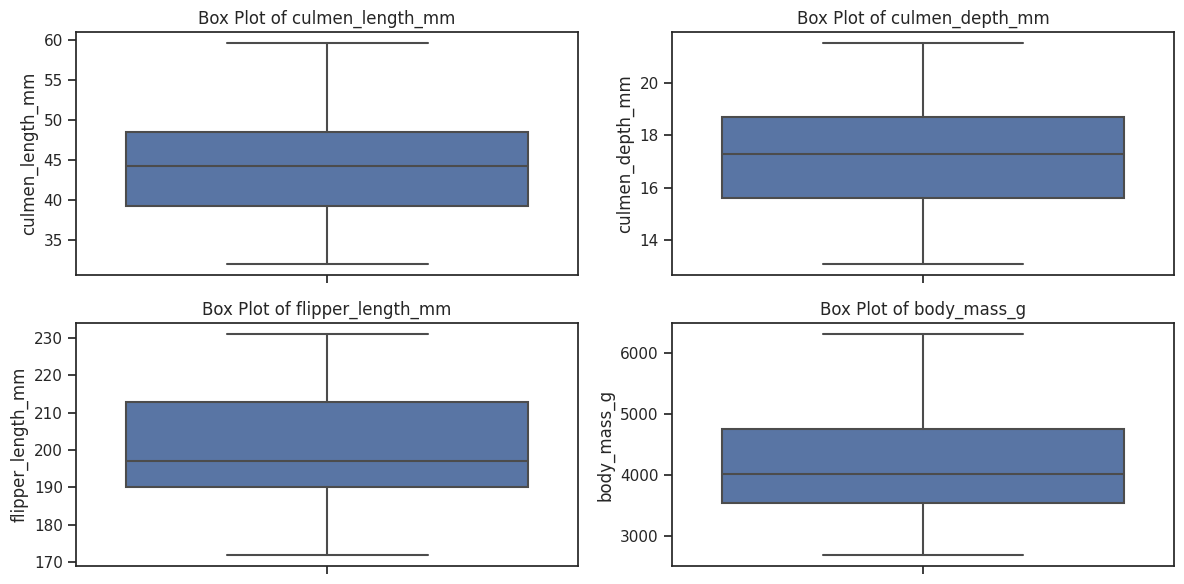

In [44]:
#Find the outliers and replace them outliers
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

#box plot to visualize outliers
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(2,2,i)
  sns.boxplot(data=data, y=col)
  plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [45]:
#removing outliers using the Interquartile Range

def rem_outliers (data,col):
  q1= data[col].quantile(0.25)
  q3= data[col].quantile(0.75)
  IQR = q3 - q1
  lb = q1 - 1.5*IQR
  ub = q3 +1.5*IQR
  data = data[(data[col]>=lb)&(data[col]<=ub)]
  return data

for co in numerical_cols:
  data = rem_outliers(data,col)

In [46]:
#identifying categorical columns
cat_col = data.select_dtypes(include=['object', 'category']).columns
print(cat_col)

Index(['species', 'island', 'sex'], dtype='object')


In [48]:
#encoding the categorical columns into numerical columns
lb_encoder = LabelEncoder();
for i in cat_col :
  data[i]=lb_encoder.fit_transform(data[i])

In [49]:
#Categorical values converted into the numerical values
print(data[cat_col].head())

   species  island  sex
0        0       2    2
1        0       2    1
2        0       2    1
3        0       2    2
4        0       2    1


In [50]:
#Checking the Correlation of independent variables with the target
corr_target = data.corr()["species"]
print(corr_target)

species              1.000000
island              -0.635659
culmen_length_mm     0.727832
culmen_depth_mm     -0.741363
flipper_length_mm    0.849256
body_mass_g          0.746913
sex                 -0.003823
Name: species, dtype: float64


In [51]:
#spliting the data into dependent and independent variables
x = data.drop(columns=["species"])
y = data["species"]

In [52]:
#scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
#split the data into training and testing
x_train , x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [55]:
#checking the training and testing data shape
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (275, 6)
x_test shape :  (69, 6)
y_train shape :  (275,)
y_test shape :  (69,)
